# <center>Python Analysis of the Globular Cluster 47 Tuc</center> 


## 1. Introduction
The aim of this project was to analyse data from the Gaia spacecraft on the stars within the globular cluster 47 Tuc. This data was manipulated using Python to generate a Hertzsprung-Russell diagram for the cluster. 


Several libraries were used to carry out the analysis, these include: `Pandas`, `NumPy`, and `Matplotlib`. `Pandas` is a data analysis library that allows for storing data in dataframes, these dataframes greatly simplify data manipulation. `Numpy` was used for mathematical operations such as trigonometric identities and conversions between degrees and radians. `Matplotlib.pyplot` was used to create detailed plots from the data, `Matplotlib.ticker` was used to configure the axis ticks on these plots, and `Matplotlib.colors` was used to manipulate colour bars. `Matplotlib` was configured for plots to be: displayed in high resolution, plotted in-line in the notebook, and to have a consistent font styling throughout the document.  

In [1]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import numpy as np
import pandas as pd
                            
#Configuring matplotlib.
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#Setting a consistent font style for every plot.
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

Each of these libraries was imported as a common abbreviation (such as `plt`) to simplify the code throughout the notebook.

The data was provided in two comma separated value `.csv` files. Both files contained data on the stars within the 47 Tuc cluster, and both contained the columns: source ID `source_id`, right ascension angle `ra`, and declination angle `dec`. This allowed for the two files to be imported into individual `Pandas` dataframes then merged via an inner merge using `Pandas`.

In [2]:
#Importing each file into its own dataframe.
df_gaia      = pd.read_csv('./Data/47tuc_gaia_data.csv')
df_positions = pd.read_csv('./Data/47tuc_positions.csv')

In [3]:
#Displaying the first dataframe and its size.
print(df_gaia.shape)
df_gaia.head(3)

(7834, 7)


,source_id,ra,dec,phot_g_mean_mag,bp_rp,pmra,pmdec
0,4689544567094557440,5.575178,-72.502891,18.642883,0.965523,4.950253,-1.995966
1,4689541955754300672,4.999976,-72.646056,19.119717,1.259825,0.715769,-1.697977
2,4689541234199794816,5.225171,-72.642103,18.516747,1.046042,10.724800,-2.139549


In [4]:
#Displaying the second dataframe and its size.
print(df_positions.shape)
df_positions.head(3)

(7834, 4)


,source_id,ra,dec,r_est
0,4689544567094557440,5.575178,-72.502891,2497.265269
1,4689541955754300672,4.999976,-72.646056,2181.867979
2,4689541234199794816,5.225171,-72.642103,2503.651243


An inner merge was then used as there were three common columns between the two dataframes (`source_id`, `ra`, `dec`), and the number of rows in each dataframe was the same. A specific column was not specified in the merge command as this allows `Pandas` to merge over the three matching columns rather than just one. This prevents duplication of columns.

In [5]:
#Performing an inner merge, joining the dataframes into one. Column not specified to allow for merge over the three common cols.
df_combined = pd.merge(left=df_positions, right=df_gaia, how='inner')

#Displaying the shape and first three rows of the dataframe.
print(df_combined.shape)
df_combined.head(3)

(7834, 8)


,source_id,ra,dec,r_est,phot_g_mean_mag,bp_rp,pmra,pmdec
0,4689544567094557440,5.575178,-72.502891,2497.265269,18.642883,0.965523,4.950253,-1.995966
1,4689541955754300672,4.999976,-72.646056,2181.867979,19.119717,1.259825,0.715769,-1.697977
2,4689541234199794816,5.225171,-72.642103,2503.651243,18.516747,1.046042,10.724800,-2.139549


This combined dataframe contained eight variables in the following order: 
- Source ID (dimensionless), `source_id`;
- Right ascension (degrees), `ra`;
- Declination (degrees), `dec`;
- Estimated distance to star (parsecs), `r_est`;
- G-band apparent magnitude (magnitudes), `phot_g_mean_mag`;
- B-R colour (magnitudes), `bp_rp`;
- Proper motion of the right ascension (milli-arcseconds per year), `pmra`;
- Proper motion of the declination (milli-arcseconds per year), `pmdec`. 

However, the columns containing the proper motion of the angular position of each star (`pmra`, `pmdec`) were not relevant to this analysis, and were therefore dropped from the dataframe. The reduced dataframe formed from this, `df_data`, was used for all further analysis. This reduced dataframe contained the six remaining relevant variables.

In [6]:
#Dropping columns not relevant to analysis, displaying df_data.
df_data = df_combined.drop(['pmra', 'pmdec'], axis=1)

#Displaying the shape and first three rows of the dataframe.
print(df_data.shape)
df_data.head(3)

(7834, 6)


,source_id,ra,dec,r_est,phot_g_mean_mag,bp_rp
0,4689544567094557440,5.575178,-72.502891,2497.265269,18.642883,0.965523
1,4689541955754300672,4.999976,-72.646056,2181.867979,19.119717,1.259825
2,4689541234199794816,5.225171,-72.642103,2503.651243,18.516747,1.046042


Prior to performing analysis on this data, any rows within `df_data` that contained a missing value were first considered. 

In [7]:
#Considering missing data.
df_data.isna().sum()

source_id            0
ra                   0
dec                  0
r_est                0
phot_g_mean_mag      0
bp_rp              639
dtype: int64

This analysis shows that the column `bp_rp` contained 639 rows with missing values, and that it was the only column to contain missing values. This column held the B-R colour of each star. The rows that contained the missing B-R data were not removed at this stage as other data in these rows remained relevant to following areas of the analysis.

A supporting document contained the right ascension and declination of the centre of the globular cluster 47 Tuc. These values were provided in degrees, consistent with the other angle values within the dataframe. The values were stored in variables for usage throughout the analysis.

In [8]:
#Position of the centre of the cluster (degrees).
centre_ra  =  6.022
centre_dec = -72.081

## 2. Data Analysis

### 2.1 Calculating the Angle of Each Star From the Centre of the Cluster

The data for the right ascension and declination of each star was used to calculate the angle between the star and the centre of the cluster. This was done by using the formula for the central angle,

\begin{equation*}
\cos(ca)=\sin(d_1)\sin(d_2)+\cos(d_1)\cos(d_2)\cos(ra_1-ra_2) ,
\end{equation*}

where the letter $d$ denotes the declination in radians, $ra$ denotes the right ascension in radians, and $ca$ is the central angle in radians. All values with subscript '1' are those of the centre of the cluster, and those with a subscript '2' are those of the star. 

The central angle was found for each star by using a function taking right ascension `ra` and declination values `dec` in degrees as inputs and outputting the central angle in degrees. However, the calculation itself needed to be carried out with the angles in radians. `NumPy` was used to convert each input to radians before the calculation and convert the central angle back to degrees once complete.

In [9]:
#Define function to calculate central angle (degrees) from the right ascension (degrees) and declination (degrees).
def centralangle(ra1,dec1,ra2,dec2):
    
    #Converting to Radians
    ra1=np.radians(ra1)
    dec1=np.radians(dec1)
    ra2=np.radians(ra2)
    dec2=np.radians(dec2)
    
    #Calculating the central angle in radians.
    ca = np.arccos (  np.sin(dec1) * np.sin(dec2) + np.cos(dec1) * np.cos(dec2) * np.cos(ra1-ra2)  )
    
    #Converting central angle into degrees.
    ca=np.degrees(ca)
    return ca

This function was applied to every row in the dataframe, and the resultant values for the centre angle (degrees) were added as a new dataframe column, `ca`.

In [10]:
#Adding a new column to the dataframe to store the central angle for each star.
df_data['ca'] = centralangle(centre_ra, centre_dec, df_data.ra, df_data.dec)

df_data.head(3)

,source_id,ra,dec,r_est,phot_g_mean_mag,bp_rp,ca
0,4689544567094557440,5.575178,-72.502891,2497.265269,18.642883,0.965523,0.443238
1,4689541955754300672,4.999976,-72.646056,2181.867979,19.119717,1.259825,0.644318
2,4689541234199794816,5.225171,-72.642103,2503.651243,18.516747,1.046042,0.610834


The data set provided included stars that are outside of the dense core of the cluster. The stars outside of the centre of the cluster were removed before any further analysis; this was done by consideration of the central angle `ca` from the centre of the cluster. The threshold central angle was chosen through a visual assessment of a plot of right ascension against declination (Figure 1, Figure 2), and compared to a value for the angular size of the cluster from the SIMBAD Astronomical Database found by Zhengyi Shao [1].

A threshold centre angle was used in this case as the large distance to the cluster means that the cluster can be approximated as a 2D ellipse. Any stars outside of the threshold centre angle were dropped, however stars that are behind or in front of the cluster were not be removed by this. The stars within the core of the cluster greatly outnumber stars in front or behind the cluster, so it is reasonable to keep these stars within the data set. The HR diagram will not be meaningfully effected.

The stars in front or behind the cluster could be removed by considering the radius of the cluster in parsecs, then dropping stars that are a distance greater than the radius from the centre of the cluster. The column `r_est` could be used to consider this for each star.

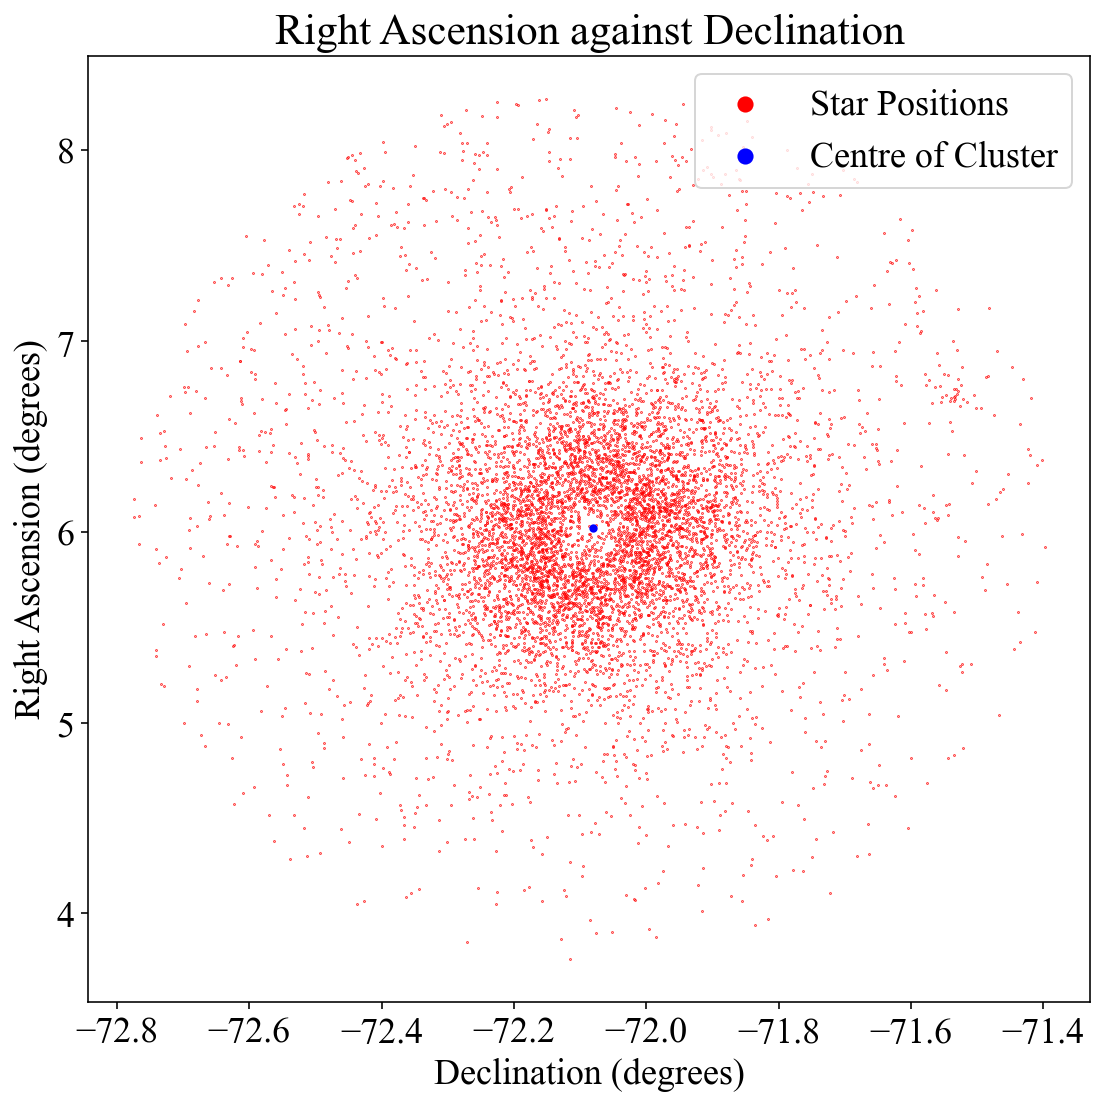

In [11]:
#Initialise the figure.
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(1,1,1)

#Plot scatter plot of declination angle (degrees) against right ascension (degrees). 
ax1.scatter(df_data.dec, df_data.ra, marker='o', s=0.1, color='red', label='Star Positions')

#Plot single data point for centre of cluster.
ax1.scatter(centre_dec, centre_ra, marker='o', s=10, color='blue', label='Centre of Cluster')

#Specify axis labels and title.
ax1.set_xlabel('Declination (degrees)')
ax1.set_ylabel('Right Ascension (degrees)')
ax1.set_title('Right Ascension against Declination')

#Configure legend.
legend = ax1.legend(loc='upper right')
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]

plt.tight_layout()
plt.show()

**Figure 1**: Plot of right ascension (degrees) against declination (degrees) for the globular cluster 47 Tuc. Individual star positions plotted in red, the centre of the cluster plotted in blue.



Figure 1 shows the dense core of the cluster surrounded by a less dense distribution of surrounding stars. The SIMBAD Astronomical Database [1] states that 47 Tuc has an angular radius of 0.365 degrees, hence this will be used as the threshold centre angle `ca` for the edge of the cluster. To test this value for the threshold angle, the amount of dropped stars were calculated and a plot of the selected stars was created. 

The axes in Figure 1 show that the cluster takes the form of an ellipse from our point of view, indicating that the cluster is a spheroid. 

In [12]:
#Calculating the mean and standard deviation of the central angle.
print( "Mean Central Angle  :", round( df_data.ca.mean(), 3) )
print( "SD of Central Angle :", round( df_data.ca.std(), 3)  )

Mean Central Angle  : 0.23
SD of Central Angle : 0.154


In [13]:
#Calculating number of rows that would be dropped.
print(df_data.ca[df_data.ca > 0.365].count(), "rows would be removed.")

#Calculating the percentage of rows that would be dropped.
percentReduction = (df_data.ca[df_data.ca > 0.365].count() / df_data.ca.count() ) * 100
print(percentReduction.round(2), "% of total number rows would be removed.")

1376 rows would be removed.
17.56 % of total number rows would be removed.


The mean central angle `ca` was 0.23 and the standard deviation was 0.154. The threshold value of 0.365 degrees is 0.88 standard deviations away from the mean. Dropping all stars with a central angle greater than 0.365 degrees would result in 1376 rows being dropped, 17.56 % of all rows. These values seemed appropriate, and all rows outside of the acceptable range were dropped. All remaining stars can be said to be within the radius of the cluster.

In [14]:
#Dropping rows with a central angle greater than the treshold of 0.365 degrees.
print(df_data.shape)

df_data = df_data.drop(df_data[df_data.ca > 0.365].index)

print(df_data.shape)

(7834, 7)
(6458, 7)


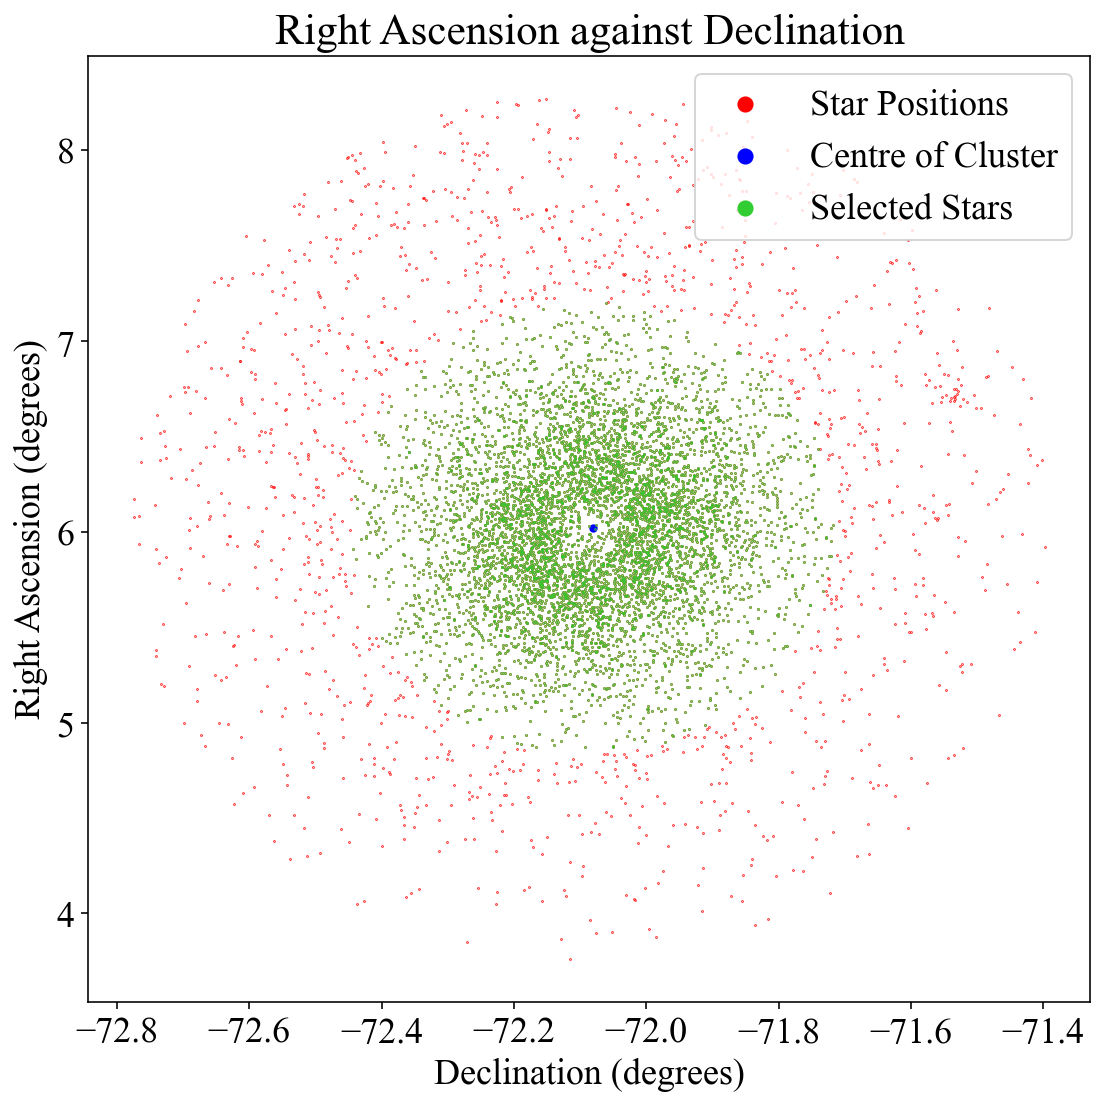

In [15]:
#Replot Figure 1 with selected stars overlayed in a different colour (same plot command as other stars removed from dataframe)
ax1.scatter(df_data.dec, df_data.ra, marker='o', s=0.12, color='limegreen', label='Selected Stars')
legend = ax1.legend(loc='upper right')
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
fig1

**Figure 2**: A plot of right ascension (degrees) against declination (degrees) for the globular cluster 47 Tuc. Selected stars overlaid in green, centre of cluster plotted in blue.

Figure 2 shows that stars within the cluster have been selected (shown in green), and the stars outside of the cluster that were caught in the observation have been dropped. This points towards the threshold centre angle `ca` of 0.365 degrees being appropriate. 

### 2.2 Colour - Apparent Magnitude Diagram

The remaining data within the dataframe was used to plot a diagram of apparent G-band magnitude `phot_g_mean_mag` against the B-R colour of the star `bp_rp`. Both columns are in units of magnitudes. The y-axis needed to be inverted due to the nature of the magnitude scale.

Prior to plotting, one star with an abnormally high B-R colour was removed from the dataframe to allow for a better graph. This value was removed from the dataframe entirely rather than just excluding it from the plot as it would also cause issues in further plots.

The problematic B-R data point had a value of 4.339 magnitudes, 17 standard deviations away from the mean of 0.924.

In [16]:
#Calculating the mean and standard deviation of the B-R colour of the stars.
print( "Mean B-R Value     :", round(df_data.bp_rp.mean(), 3) )
print( "SD of B-R Value    :", round(df_data.bp_rp.std(), 3) )

#Calculating Max B-R Value
print("Abnormal B-R value :", round(df_data.bp_rp.max(),3) )

Mean B-R Value     : 0.924
SD of B-R Value    : 0.2
Abnormal B-R value : 4.339


In [17]:
#Dropping star with abnormally high B-R colour.
print(df_data.shape)

df_data = df_data.drop(df_data[df_data.bp_rp > 3].index)

print(df_data.shape)

(6458, 7)
(6457, 7)


At this stage the rows with missing values in the `bp_rp` column needed to be removed, 628 rows were dropped here. All further plots have some dependence on the B-R colour of the star, removing any missing values here allows following plots to work without errors. 

In [18]:
#Dropping rows with missing B-R values.
print(df_data.shape)

df_data = df_data.dropna(subset = ['bp_rp'])

print(df_data.shape)

(6457, 7)
(5829, 7)


The graph of apparent G-band magnitude `phot_g_mean_mag` against the B-R colour of the star `bp_rp` was then plotted.

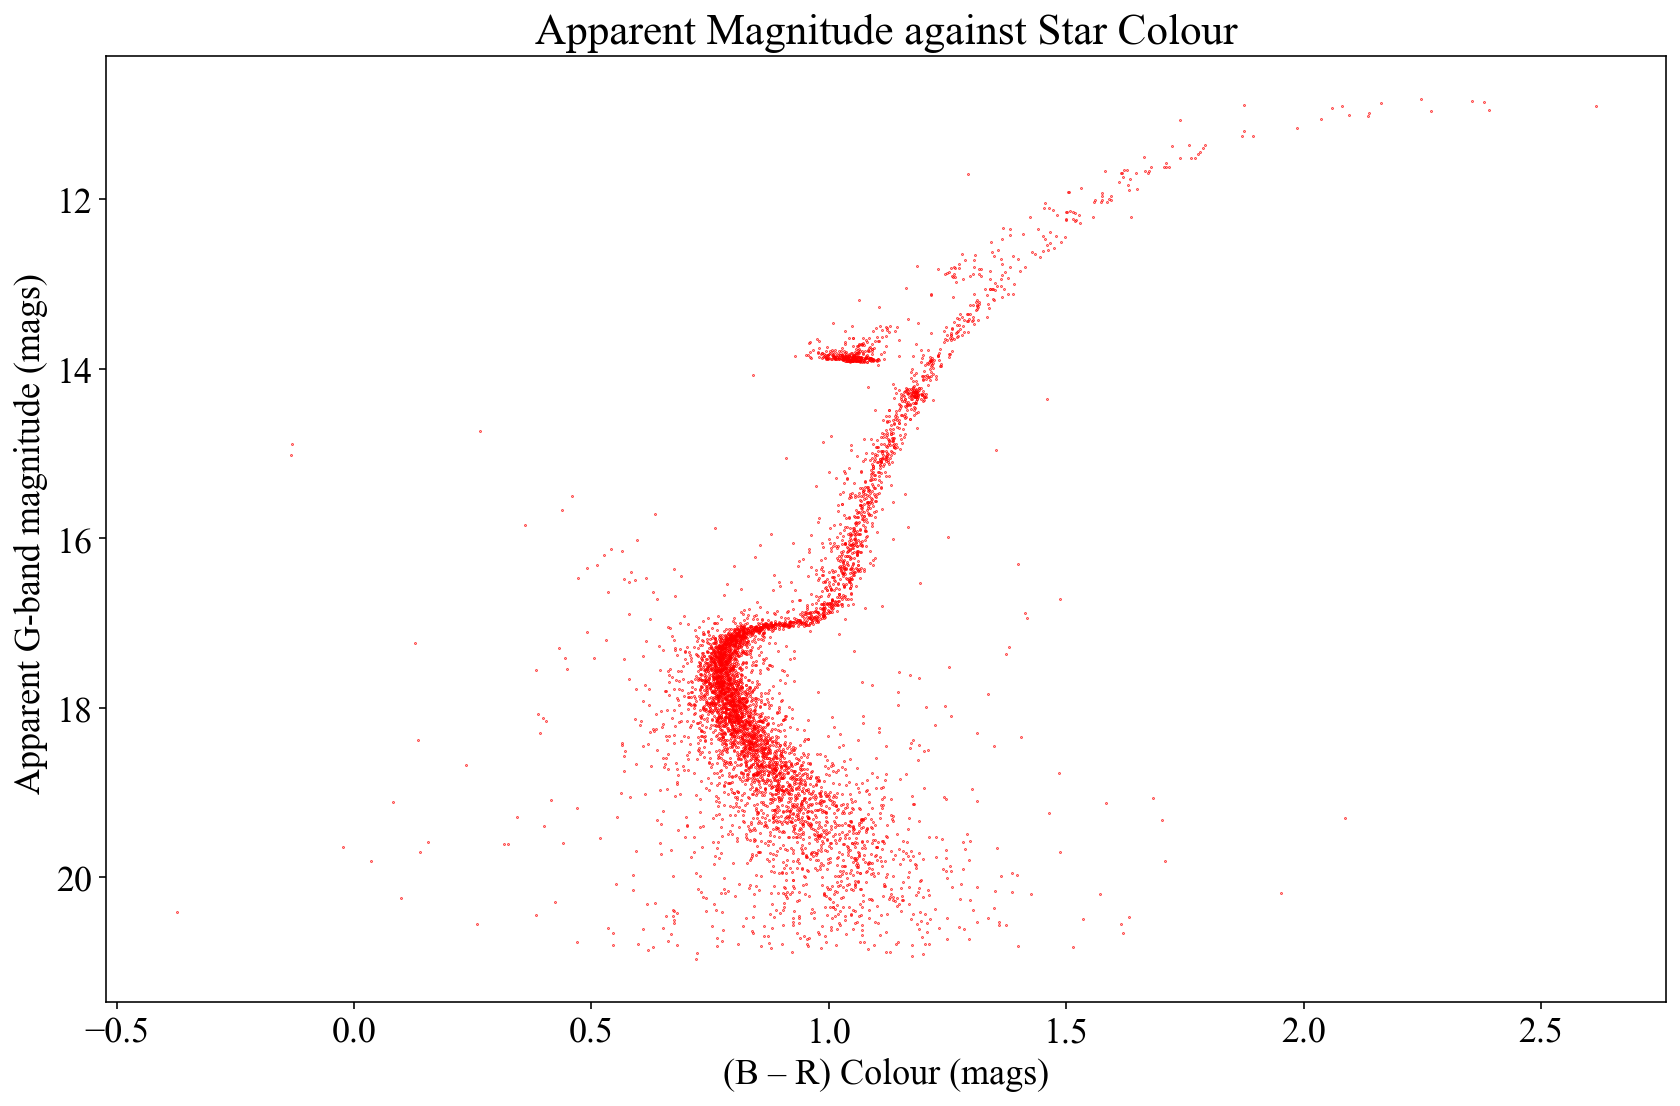

In [19]:
#Initialise the figure.
fig2= plt.figure(figsize=(12,8))
ax2 = fig2.add_subplot(1,1,1)

#Plot scatter plot of apparent magnitude (magnitudes) against B-R colour (magnitudes).
ax2.scatter(df_data.bp_rp, df_data.phot_g_mean_mag, marker='o', s=0.1, color='red')

#Specify axis labels and title.
ax2.set_xlabel('(B – R) Colour (mags)')
ax2.set_ylabel('Apparent G-band magnitude (mags) ')
ax2.set_title('Apparent Magnitude against Star Colour')

#Inverting y-axis due to nature of magnitude scale.
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

**Figure 3**: A scatter plot of the apparent G-band magnitude (magnitudes) against the B-R colour (magnitudes) of stars in the 47 Tuc globular cluster.

The shape of the graph produced is typical of a graph of this type, taking the shape of a Hertzsprung–Russell diagram. Building towards creating a true Hertzsprung–Russell diagram, the apparent magnitude values `phot_g_mean_mag` needed to be adjusted to absolute magnitudes.

### 2.3 Colour - Absolute Magnitude Diagram

The values for apparent magnitude were converted to values of absolute magnitude through the application of the distance modulus equations. Within these equations: $m$ denotes apparent magnitude `phot_g_mean_mag`, $M$ the absolute magnitude, $d$ the distance to the star from earth (parsecs) `r_est`, and $\mu$ the distance modulus.

$$ \mu=m-M $$

\begin{equation*}
\mu=5\log(d)-5
\end{equation*}

The two equations above can be rearranged to form an equation for $M$ in terms of $m$ and $d$,

\begin{equation*}
M=m-5\log(d)+5 .
\end{equation*}

The equation written above was used to generate the absolute G-band magnitude, $M$, of each star (magnitudes). This data was then added to the dataframe as a new column, `M`.

In [20]:
#Using equation above to calculate the absolute magnitude of each star from its apparent magnitude and distance from earth (pc).
df_data['M'] = df_data.phot_g_mean_mag - 5*np.log10(df_data.r_est) + 5

df_data.head(3)

,source_id,ra,dec,r_est,phot_g_mean_mag,bp_rp,ca,M
39,4689575323366942336,6.452890,-72.235753,2911.914912,17.831867,0.826576,0.203414,5.510974
40,4689574700606123392,6.145952,-72.278703,2808.778927,18.226437,0.851517,0.201309,5.983849
41,4689568515833344512,6.096631,-72.419252,2666.821113,18.413027,0.893757,0.339016,6.283058


A new graph of absolute G-band magnitude `M` against B-R colour `bp_rp` was then plotted in the same manner as Figure 3. This was done to build towards creating a full Hertzsprung–Russell diagram for the globular cluster. Once again the y-axis was inverted due to the magnitude scale.

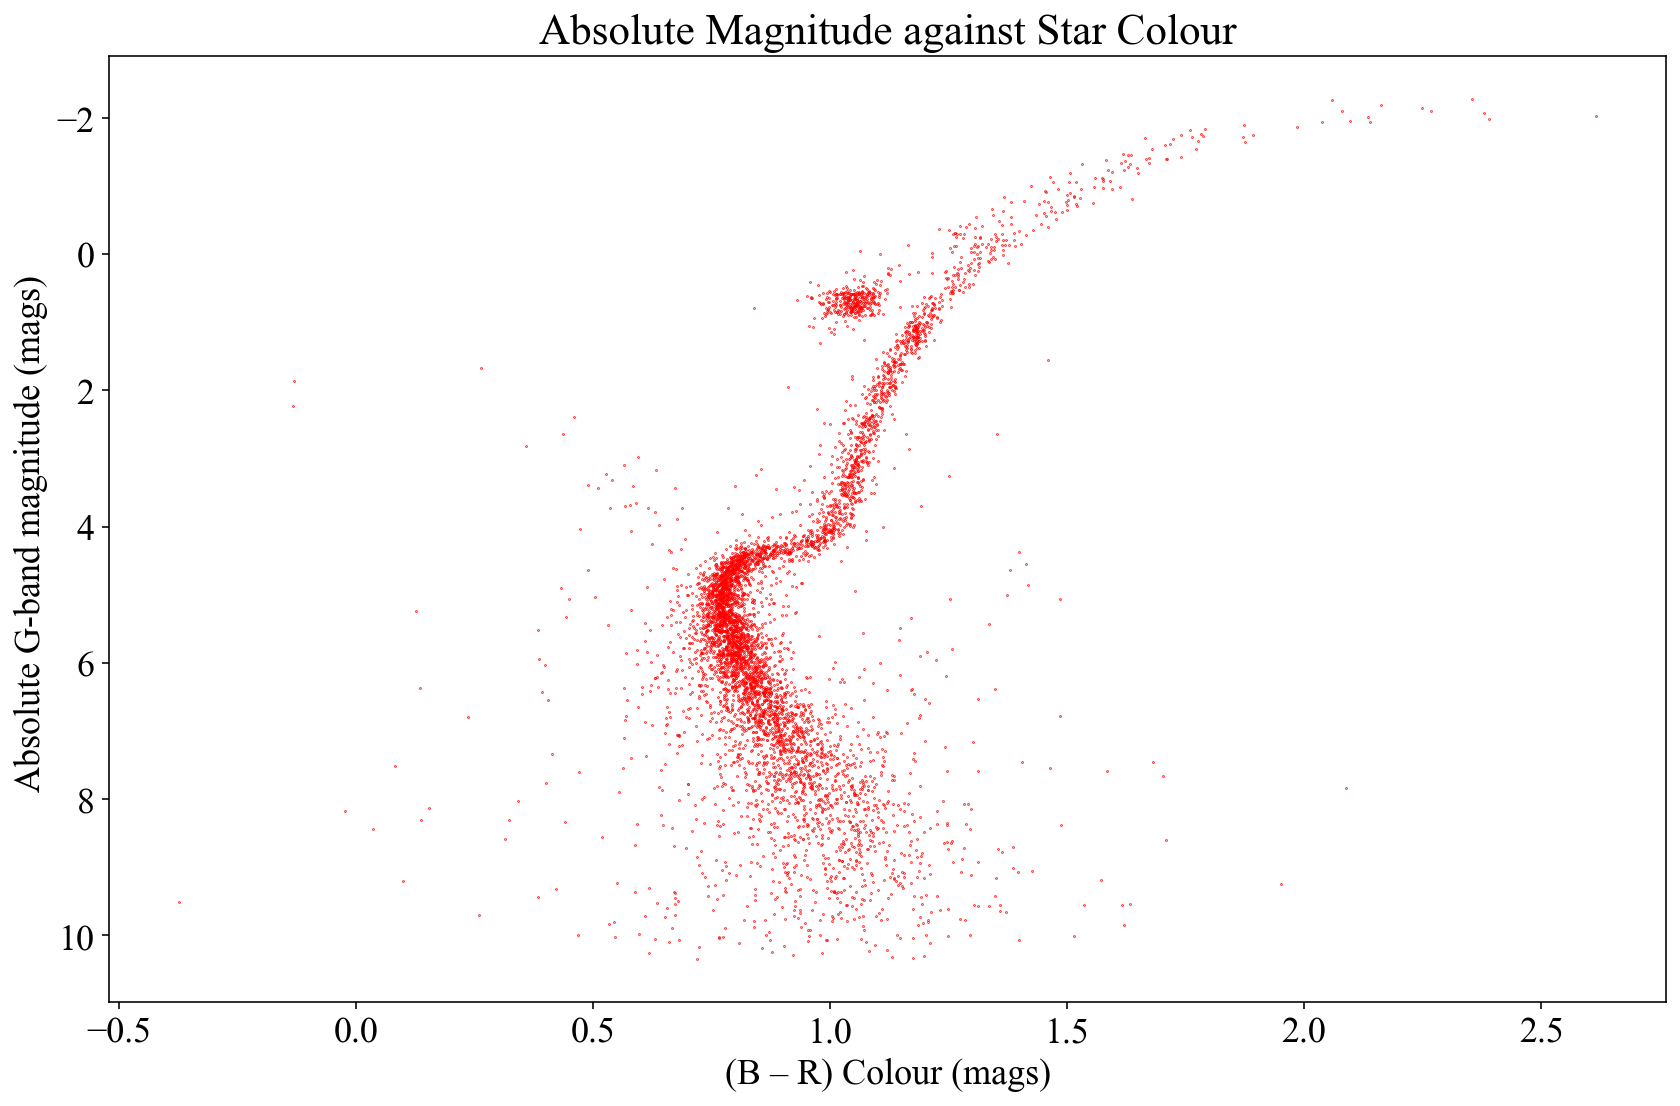

In [21]:
#Initialise the figure.
fig3= plt.figure(figsize=(12,8))
ax3 = fig3.add_subplot(1,1,1)

#Plot scatter plot of apparent magnitude (magnitudes) against B-R colour (magnitudes).
ax3.scatter(df_data.bp_rp, df_data.M, marker='o', s=0.1, color='red')

#Specify axis labels and title.
ax3.set_xlabel('(B – R) Colour (mags)')
ax3.set_ylabel('Absolute G-band magnitude (mags) ')
ax3.set_title ('Absolute Magnitude against Star Colour')

#Inverting y-axis due to nature of magnitude scale.
ax3.invert_yaxis()

plt.tight_layout()
plt.show()

**Figure 4**: A scatter plot of the absolute G-band magnitude (magnitudes) against the B-R colour (magnitudes) of stars in the 47 Tuc globular cluster.


Figure 4 is very similar to the graph of apparent magnitude against star colour, but has an adjusted y-axis. The graph again resembles a Hertzsprung–Russell diagram. The horizontal branch has become more spread out as a result of the change of the axis.

### 2.4 Hertzsprung–Russell Diagram

A Hertzsprung–Russell diagram is typically plotted with the luminosity on the y axis, and the temperature of the star on the x axis. The luminosity value of each star (solar luminosity units) was found by using an equation in terms of the absolute magnitude of the star `M` and our sun,

\begin{equation*}
\frac{L}{L_\odot}=10^{\frac{(M_\odot-M)}{2.5}} .
\end{equation*}

The luminosity value for each star was calculated using this equation, taking the absolute magnitude of the sun `M_Solar` to be 4.81 magnitudes. The luminosities were added to the dataframe as a new column, `L` (solar luminosities).

In [22]:
#Assign the absolute magnitude of the sun to a variable.
M_Solar = 4.81

#The luminosity of each star found using the above equation and added to the dataframe as a new column.
df_data["L"] = 10**((M_Solar-df_data.M)/2.5)

df_data.head(3)

,source_id,ra,dec,r_est,phot_g_mean_mag,bp_rp,ca,M,L
39,4689575323366942336,6.452890,-72.235753,2911.914912,17.831867,0.826576,0.203414,5.510974,0.524337
40,4689574700606123392,6.145952,-72.278703,2808.778927,18.226437,0.851517,0.201309,5.983849,0.339203
41,4689568515833344512,6.096631,-72.419252,2666.821113,18.413027,0.893757,0.339016,6.283058,0.257500


The effective temperature of each star (Kelvin) was found by using its B-R value `bp_rp` in the formula found by Ballesteros [2],

\begin{equation*}
T_{\text{eff}}=4600 \Big[ \frac{1}{0.92(B-R)+1.7} + \frac{1}{0.92(B-R)+0.62}\Big] .
\end{equation*}

The values for the effective temperature of each star were calculated and added to the dataframe as a new column, `T_eff` (Kelvin).

In [23]:
#Using equation above to generate effective temperature values for each star.
df_data["T_eff"] = 4600*(   (1/(0.92*(df_data.bp_rp)+1.7))  +   (1/(0.92*(df_data.bp_rp)+0.62)) )

df_data.head(3)

,source_id,ra,dec,r_est,phot_g_mean_mag,bp_rp,ca,M,L,T_eff
39,4689575323366942336,6.452890,-72.235753,2911.914912,17.831867,0.826576,0.203414,5.510974,0.524337,5201.823017
40,4689574700606123392,6.145952,-72.278703,2808.778927,18.226437,0.851517,0.201309,5.983849,0.339203,5130.067579
41,4689568515833344512,6.096631,-72.419252,2666.821113,18.413027,0.893757,0.339016,6.283058,0.257500,5013.210825


This generated several data points with temperatures that fell far from the main trend. To allow for a better plot, the outlying points with temperatures `T_eff` below 2000 K or above 8000 K were removed. A total of 11 data points were removed from the dataframe at this stage.

In [24]:
#Removing rows above with effective temperature below 2000k or above 8000k. 
print(df_data.shape)

df_data = df_data.drop(df_data[df_data.T_eff > 8000].index | df_data[df_data.T_eff <2000].index)

print(df_data.shape)

(5829, 10)
(5818, 10)


The Hertzsprung–Russell diagram of luminosity `L` (solar luminosities)  against effective temperature `T_eff` (Kelvin)  was then plotted. For this graph, the y-axis was set to be a logarithmic scale and the x-axis was inverted. These axis adjustments are common on Hertzsprung–Russell diagrams.

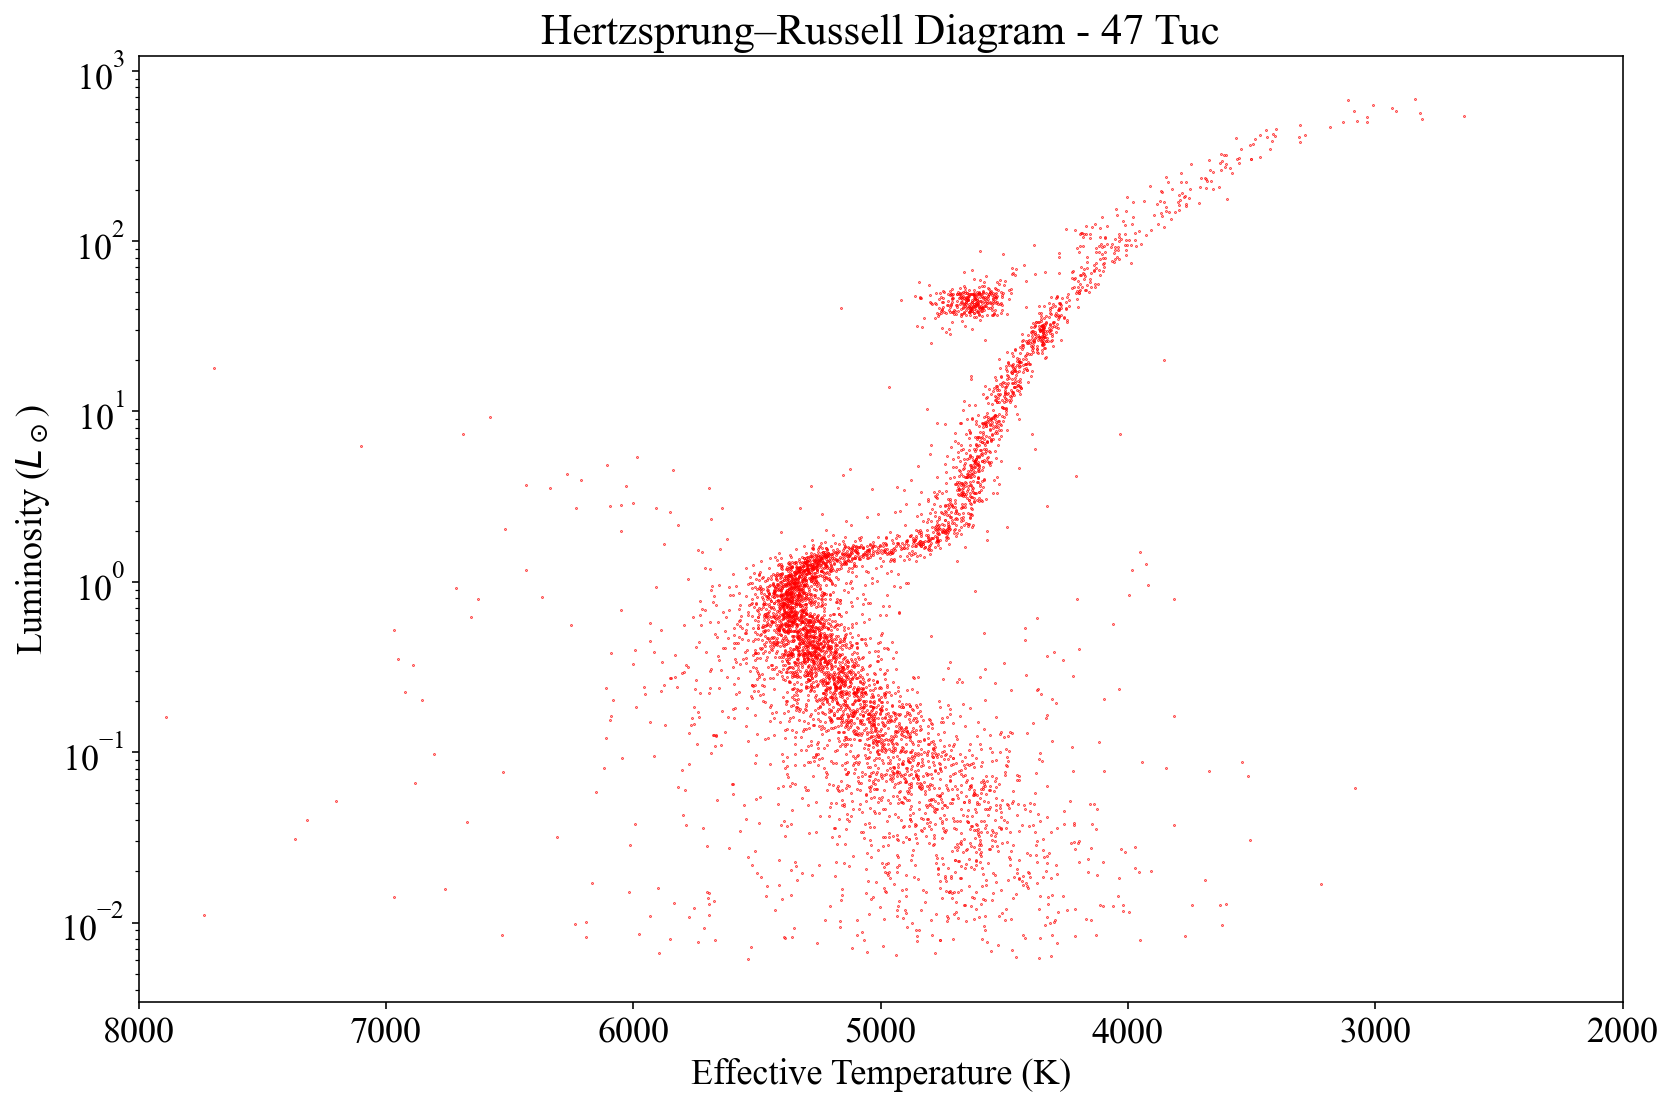

In [25]:
#Initialise the figure.
fig4= plt.figure(figsize=(12,8))
ax4 = fig4.add_subplot(1,1,1)

#Plot scatter plot of luminosity (solar luminosities) against effective temperature (Kelvin).
ax4.scatter(df_data.T_eff, df_data.L, marker='o', s=0.1, color='red')

#Specify axis labels and title.
ax4.set_xlabel('Effective Temperature (K)')
ax4.set_ylabel('Luminosity ($L_\odot$)')
ax4.set_title('Hertzsprung–Russell Diagram - 47 Tuc')

#Setting x axis limits to match temperature reange selected above.
ax4.set_xlim([2000, 8000])

#Set y-axis to logarithmic scale.
ax4.set_yscale('log')

#Invert x-axis, cooler temperatures as you move right.
ax4.invert_xaxis()

plt.tight_layout()
plt.show()

**Figure 5**: A Hertzsprung–Russell diagram for the 47 Tuc globular cluster, with axis of luminosity (solar luminosities) against effective temperature (Kelvin).

### 2.5 Hertzsprung–Russell Diagram - Developed

Building on the Hertzsprung–Russell diagram further, the stellar radius of each star can be displayed on the graph using a colour map and colour bar. The stellar radius of each star was found using ratios with the blackbody formula,

\begin{equation*}
L = {4\pi}{R^2}{\sigma}{T^4}.
\end{equation*}

Taking ratios, comparing values for each star to the values for our sun (denoted by $_\odot$),

\begin{equation*}
\frac{L}{L_\odot}=\Big(\frac{R}{R_\odot}\Big)^2\Big(\frac{T_{\text{eff}}}{T_{\text{eff}_\odot}}\Big)^4 .
\end{equation*}

By rearranging for the stellar radius, *R* (in units of solar radii), you get,

\begin{equation*}
\frac{R}{R_\odot} = \sqrt{ \frac{L}{L_\odot} \Big(\frac{T_{\text{eff}_\odot}} {T_{\text{eff}}}\Big)^4} ,
\end{equation*}

which was then applied to each star in the dataframe and added as a new column, the stellar radius `R` (solar radii). The effective temperature of the sun was taken to be 5756 K. All other values required are known; the effective temperature `T_eff` (Kelvin) and luminosity `L` (solar luminosities) were found in previous sections.

In [26]:
#Assign the effective temperature of the sun to a variable.
T_eff_solar = 5756

#The radius of each star found using the above equation and added to the dataframe as a new column.
df_data['R'] = (  (df_data.L) * ((T_eff_solar/df_data.T_eff)**4)  )**0.5

df_data.head(3)

,source_id,ra,dec,r_est,phot_g_mean_mag,bp_rp,ca,M,L,T_eff,R
39,4689575323366942336,6.452890,-72.235753,2911.914912,17.831867,0.826576,0.203414,5.510974,0.524337,5201.823017,0.886616
40,4689574700606123392,6.145952,-72.278703,2808.778927,18.226437,0.851517,0.201309,5.983849,0.339203,5130.067579,0.733205
41,4689568515833344512,6.096631,-72.419252,2666.821113,18.413027,0.893757,0.339016,6.283058,0.257500,5013.210825,0.668957


A histogram plot of the stellar radii data `R` (solar radii) was created to examine the distribution of stellar radii within the cluster. This is shown in Figure 6 where the x axis has units of solar radii ($R_\odot$).

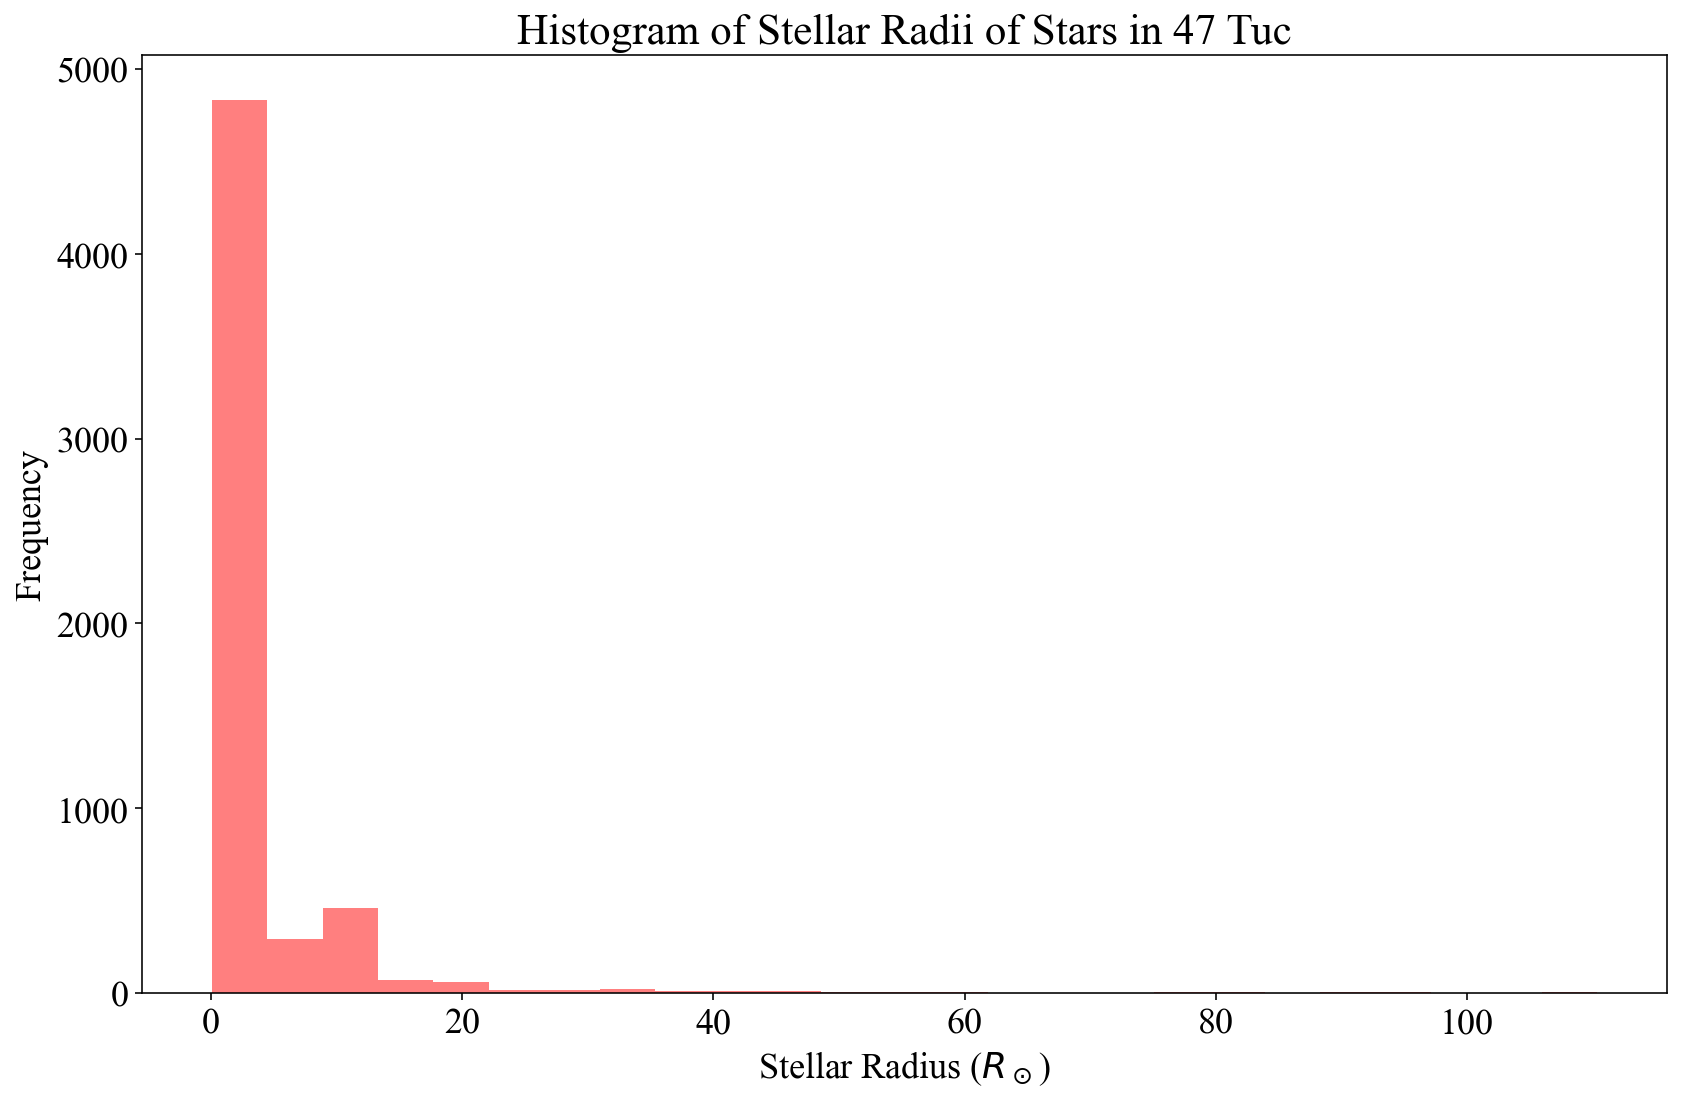

In [27]:
#Initialise the figure.
figRadii = plt.figure(figsize=(12,8))
axRadii = figRadii.add_subplot(1,1,1)

#Plot histogram of radii with 50 bins.
axRadii = df_data['R'].plot.hist(bins=25, color='red', alpha=0.5)

#Label x axis and add title.
axRadii.set_xlabel('Stellar Radius ($R_\odot$)') 
axRadii.set_title('Histogram of Stellar Radii of Stars in 47 Tuc')

plt.tight_layout()
plt.show()

**Figure 6**: A histogram showing the stellar radii of stars within the globular cluster 47 Tuc.

Using this data, the Hertzsprung–Russell diagram from Figure 5 was replotted using a colour map corresponding to the radii of the stars. The colour bar for this colour map was plotted using the `plt.colorbar` functionality within `Matplotlib`, and positioned to the far right of the plot by creating a custom set of axes. The colour bar needed to have its own set of axes in order to prevent an overlap with a second y-axis that will be positioned to the right of the plot. The colour map `plasma` was chosen to display the data as it smoothly progresses through identifiable colours.

The colour bar was normalised using a `Matplotlib.colors` logarithmic normalisation as the data is skewed towards lower values as shown in Figure 6. The range of stellar radii `R` reaches a maximum of 110.36 $R_\odot$ (solar radii) and a minimum of 0.06 $R_\odot$, with a mean of 3.14 $R_\odot$ and a standard deviation of 7.32  $R_\odot$.  However, the majority of the values are beneath 20  $R_\odot$ as shown in Figure 6. This normalisation was carried out with parameters setting the minimum and maximum values of the colour bar as 0.05 $R_\odot$ and 120 $R_\odot$, including all stellar radii in the sample. This choice of bounds leads to the logarithmic scale of the colour bar not perfectly starting/ending on a major tick; this decision was made as including all valid data was deemed more important than a perfect scale.

Working towards a complete Hertzsprung–Russell diagram, an additional horizontal axis was included for spectral class. This axis was positioned at the top of the plot, as is conventional in many Hertzsprung–Russell diagrams. Each spectral class corresponds to a region of effective temperatures `T_eff` (Kelvin), these are shown within Table 1. 

**Table 1**: The temperature (Kelvin) regions for each stellar classification.

| Class       | Temperature (K) |
| :---:        |    :----:   |
| O      |  >30000       |
| B   | 10000-30000        |
| A      | 7500-10000       |
| F   | 6000-7500        |
| G      | 5000-6000       |
| K   | 3500-5000        |
| M      | <3500       |

The range of effective temperatures found for 47 Tuc did not cover every spectral class. The range displayed within Figure 7 is from class $M$ to class $A$. These classes were plotted by using `Matplotlib.tickers`, utilising major tickers to create boundary lines between classes, and minor tickers to position the appropriate labels between these boundaries. The axis was inverted to match the temperature scale.


Adding to Figure 7 further, an additional vertical axis was included for the absolute G-band magnitude of the stars (magnitudes) `M`. This second vertical axis was positioned on the right edge of plot, between the plot and the colour bar previously mentioned. This axis was inverted due to the nature of the magnitude scale. The scale of this axis was defined by plotting an invisible scatter plot of absolute G-band magnitude `M` against temperature `T_eff` (Kelvin) that perfectly overlays the plot of luminosity against temperature. The absolute G-band magnitude axis is the same as the y axis in Figure 4.

Including these four axes is a conventional way to plot a Hertzsprung–Russell Diagram. The colour bar for stellar radii was added to allow for additional information about the cluster to be determined from the graph.

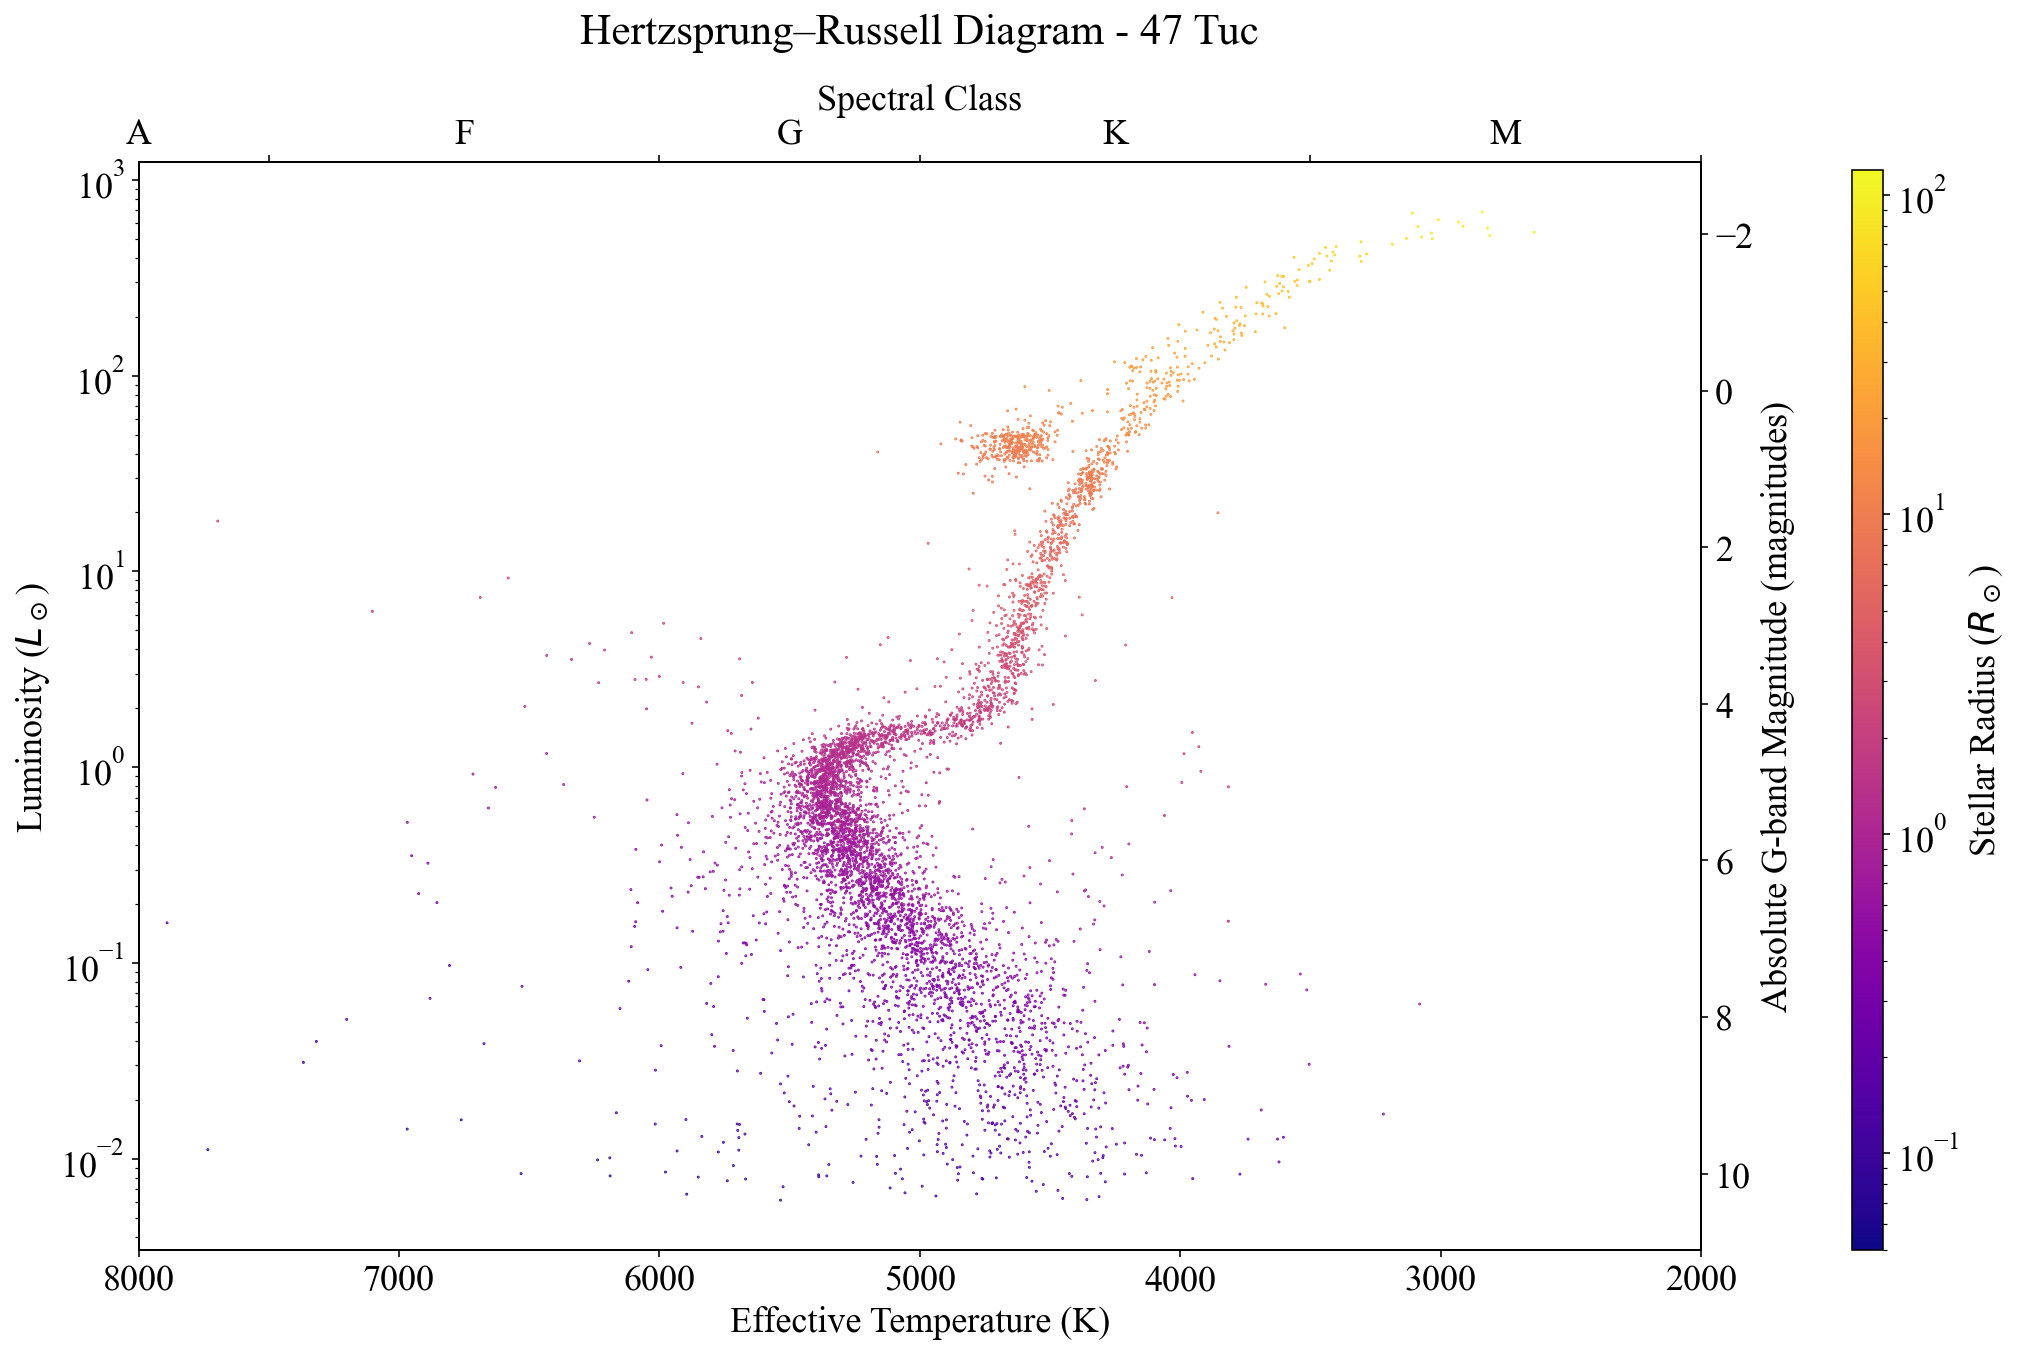

In [28]:
#Initialise the figure.
fig5 = plt.figure(figsize=(14,10))
ax5 = fig5.add_subplot(1,1,1)

#Choose colour map.
cm = plt.cm.get_cmap('plasma')

#Plot scatter diagram of luminosity (solar luminosities) against effective temperature (Kelvin), 
#Apply radius (solar radii) cmap, normalise with a log normalisation.
norm=colors.LogNorm(vmin=0.05, vmax=120)
sc = ax5.scatter(df_data.T_eff, df_data.L, c=df_data.R, marker='o', s=0.2, cmap=cm, norm=norm)

#Set up colour bar label. Place label on new axis 'cbaxes' to place the bar a chosen distance from the right axis.
cbaxes = fig5.add_axes([0.975, 0.125, .015, .75])
cbar = plt.colorbar(sc, cax=cbaxes)
cbar.set_label('Stellar Radius ($R_\odot$)')

#Specify axis labels and title. Add title padding to add room for top axis.
ax5.set_xlabel('Effective Temperature (K)')
ax5.set_ylabel('Luminosity ($L_\odot$)')
ax5.set_title('Hertzsprung–Russell Diagram - 47 Tuc', pad=20)

#Choosing limits of x axis to match selected temperature range.
ax5.set_xlim([2000, 8000])

#Setting y-axis to logarithmic scale.
ax5.set_yscale('log')

#Invert x-axis, cooler temperatures as you move right.
ax5.invert_xaxis()

#--------------------------------------------------------------------------------------------------------------------- 

#Create twin horizontal axis, position at top of figure.
ax6 = ax5.twiny()
ax6.xaxis.set_ticks_position('top')
ax6.xaxis.set_label_position('top')

#Set twin x axis limits, invert twin x axis to match effective temperature axis, and set twin x axis label.
ax6.set_xlim([2000, 8000])
ax6.invert_xaxis()
ax6.set_xlabel('Spectral Class')

#Specify major ticks corresponding to stellar classification temperature boundaries.
spectralclass_majorticks = [2000, 3500, 5000, 6000, 7500]

#Specify minor ticks as midpoints between stellar classification temperature boundaries to faciliate plotting.
spectralclass_minorticks = [2750, 4250, 5500, 6750, 8000]

#Specify names of each stellar classification, corresponding to the temperatures above.
spectralclass_names = ('M','K','G','F','A')

#Plot major ticks at stellar classification temperature boundaries with blank labels.
ax6.xaxis.set_major_locator(ticker.FixedLocator(spectralclass_majorticks))
ax6.xaxis.set_major_formatter(ticker.NullFormatter())

#Plot minor ticks at midpoints between stellar classification temperature boundaries, add label for relevant stellar class.
ax6.xaxis.set_minor_locator(ticker.FixedLocator(spectralclass_minorticks))
ax6.xaxis.set_minor_formatter(ticker.FixedFormatter((spectralclass_names)))

#Make minor tick lines invisible, visually pleasing.
for tick in ax6.xaxis.get_minor_ticks():
    tick.tick2line.set_markersize(0)

#--------------------------------------------------------------------------------------------------------------------- 

#Create twin vertical axis, position at right of figure.
ax7 = ax5.twinx()
ax7.yaxis.set_ticks_position('right')
ax7.yaxis.set_label_position('right')

#Invert twin y axis, set twin y axis label.
ax7.invert_yaxis()
ax7.set_ylabel('Absolute G-band Magnitude (magnitudes)') 

#Plot an invisible scatter plot identical to the one plotted earlier, but in terms of absolute magnitude against temperature.
ax7.scatter(df_data.T_eff, df_data.M, s=0)
    
#---------------------------------------------------------------------------------------------------------------------            

#Tight layout not used here due to custom colour bar axes conflicting.
plt.show()

**Figure 7**: A Hertzsprung–Russell diagram for the 47 Tuc globular cluster, with axes of luminosity (solar luminosities) against effective temperature (Kelvin), with an additional x axis for spectral class (dimensionless), and an additional y axis for absolute G-band magnitude (magnitudes). The stellar radius (solar radii) of each star is also shown using a colour bar.

### 2.6 Supporting Statistics

To aid in further analysis, statistical analysis of each dataframe column was carried out. This was done using `Pandas` via `df.describe()`. The data generated for each column by this operation includes:
- Number of rows,
- Mean,
- Standard deviation,    
- 25%, 50%, and 75% percentile values,
- Maximum and minimum values.

The `source_id` column was dropped prior to this analysis. This was done as it is simply an identifier for the star that does not hold any other data. The dataframe that was formed after dropping the `source_id` column was named `df_analysis`. 

In [29]:
#Dropping Source ID as no useful data can be derived from the statistics of an index.
df_analysis = df_data.drop(['source_id'], axis=1)

#Calculate statistics for all remaining columns.
df_analysis.describe()

,ra,dec,r_est,phot_g_mean_mag,bp_rp,ca,M,L,T_eff,R
count,5818.000000,5818.000000,5818.000000,5818.000000,5818.000000,5818.000000,5818.000000,5818.000000,5818.000000,5818.000000
mean,6.020428,-72.079657,2978.161385,17.416018,0.925387,0.175139,5.128543,11.821968,4976.804750,3.143518
std,0.436684,0.138418,794.618789,1.926476,0.190953,0.080821,2.484551,45.175990,456.081764,7.322010
min,4.871519,-72.443180,1296.477539,10.809400,0.236494,0.005099,-2.282123,0.006140,2640.743256,0.058417
25%,5.712277,-72.177504,2381.519604,16.868452,0.793772,0.112039,4.159063,0.162440,4653.872154,0.516625
50%,6.018665,-72.079464,2947.268498,17.760086,0.872598,0.164981,5.427121,0.566437,5071.033505,0.880047
75%,6.330820,-71.981396,3509.926390,18.688076,1.037759,0.231932,6.783266,1.821273,5299.518437,1.885251
max,7.198233,-71.721124,4648.296723,20.961681,2.614835,0.364672,10.339609,686.830036,7890.912265,110.363486


**Table 2**: A table showing the statistics of each column within the dataframe. 

## 3. Results

### 3.1 Analysis of Figures and Supporting Statistics 

The supporting statistics shown in Table 2 show that the mean stellar radius `R` within the cluster was 3.14 $R_\odot$ (solar radii), with a standard deviation of 7.32 $R_\odot$. The maximum stellar radius was found to be 110.36 $R_\odot$ and the minimum stellar radius was found to be 0.058 $R_\odot$. This shows that the stellar radii distribution is skewed towards lower values as shown in Figure 6, this necessitated the logarithmic normalisation of the colour bar.

Figure 7 displays the Hertzsprung–Russell diagram for the globular cluster 47 Tuc. This figure has a well defined main sequence and turnoff point. The subgiant, red giant, and horizontal branches are all identifiable from the plot. The main sequence turnoff point lies at approximately 5400 K, 0.8 $L_\odot$. 

A general trend that can be seen in Figure 7 is that stars with a higher stellar radii are more luminous. This is in agreement with the blackbody formula,

\begin{equation*}
L = {4\pi}{R^2}{\sigma}{T^4}.
\end{equation*}

However, the largest and must luminous stars within the cluster have some of the lowest temperatures. The stars that fit this description are supergiant stars. 

From Figure 7 it was observed that the majority of the stars within the cluster lie within the stellar classes $K$ and $G$. These classes have temperature regions of 3500-5000 K and 5000-6000 K respectively. The mean effective temperature `T_eff` of 4965.2 K agrees with this observation, laying near the threshold temperature between these two classifications. 

### 3.2 Age of the Globular Cluster 47 Tuc

The age of the cluster was estimated through the usage of the mass-luminosity relation and the equation for the main sequence lifetime. Through the examination of Figure 7, the luminosity at the main sequence turnoff point was estimated to be 0.8 ± 0.2 $L_\odot$ (solar luminosities). This value was then inputted into the mass luminosity relation,

\begin{equation*}
M = L^\frac{1}{3.5},
\end{equation*}

to find the mass of the stars at the main sequence turnoff point. As the units of $L$ are in solar luminosity units, the units of $M$ are in solar masses. This yielded the mass of the stars at the turnoff point as 0.938 ± 0.067 $M_\odot$ (solar masses). This mass value was then used in the expression for the main sequence lifetime,

\begin{equation*}
t_{\text{ms}} = 10\Big(\frac{M}{M_\odot}\Big)^{-2.5}.
\end{equation*}

This equation estimates the age of the cluster (in gigayears) by calculating the lifetime of the stars that are about to leave the main sequence. A key assumption of this equation is that all stars in the cluster formed at the same time, hence this is a rough model. The age of the cluster found from the above calculations was 11.73 ± 2.12 Gyr (gigayears).

This value can be compared to the age of the cluster found by Brogaard [3] of 11.8 Gyr with upper and lower ($3\sigma$) limits of 13.4 and 10.4 Gyr. The age of the cluster found by our analysis (11.73 ± 2.12 Gyr) is in good agreement with the work of Brogaard, with a percentage difference of 0.59%.

## 4. References
[1] Zhengyi Shao, Lu Li. *Gaia parallax of Milky Way globular clusters – A solution of mixture model*. Monthly Notices of the Royal Astronomical Society, Volume 489, Issue 3, Pages 3093–3101, November 2019.

[2] F. J. Ballesteros. *New insights into black bodies*. EPL (Europhysics Letters), 97(3), January 2012.

[3] K. Brogaard et al. *The age of 47 Tuc from self-consistent isochrone fits to colour–magnitude diagrams and the eclipsing member V69*. Monthly Notices of the Royal Astronomical Society, Volume 468, Issue 1, Pages 645–661, June 2017.